<a href="https://colab.research.google.com/github/thaohung13/BAO_CAO_GIUA_KY_AI/blob/main/Bai3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# kết nối với Google Drive trong môi trường Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#tải tập dữ liệu hình ảnh, chuyển đổi chúng thành mảng NumPy,
#và lưu các mảng này vào đĩa để sử dụng trong quá trình đào tạo hoặc kiểm tra mô hình.
from os import listdir               # lấy danh sách tệp trong thư mục huấn luyện
from numpy import asarray            # chuyển đổi danh sách ảnh và nhãn thành mảng NumPy
from numpy import save               # lưu thành tệp
from keras.utils import load_img     # load_img: để tải ảnh từ tệp
from keras.utils import img_to_array # img_to_array: chuyển đổi thành mảng NumPy

In [ ]:
# đoạn mã này được sử dụng để tải các tệp ảnh và nhãn tương ứng từ thư mục trên Google Drive
# chuẩn bị chúng cho việc huấn luyện mô hình học máy.
folder = '/content/drive/MyDrive/BAI2/'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('banhbeo'):
    output= 1.0
  if file.startswith('banhcan'):
    output= 2.0
  if file.startswith('banhchung'):
    output= 3.0
  if file.startswith('banhit'):
    output= 4.0
  if file.startswith('banhmi'):
    output= 5.0
  if file.startswith('banhtet'):
    output= 6.0
  if file.startswith('banhtrungthu'):
    output= 7.0
  if file.startswith('banhxeo'):
    output= 8.0
  if file.startswith('bunbohue'):
    output= 9.0
  if file.startswith('hutieu'):
    output= 10.0
  photo = load_img(folder + file, target_size= (40,40))
  photo = img_to_array(photo) # Chuyển đổi ảnh thành một mảng NumPy
  photos.append(photo)  # Thêm mảng ảnh vào danh sách photos
  labels.append(output) # Thêm giá trị output tương ứng vào danh sách labels

In [ ]:
# lưu trữ các mảng numpy photos và labels
photos= asarray(photos) # Chuyển danh sách ảnh thành một mảng NumPy
labels= asarray(labels) # Chuyển danh sách nhãn thành một mảng NumPy
print(photos.shape, labels.shape) # In ra kích thước của mảng ảnh và mảng nhãn
# photos.shape trả về kích thước của mảng photos, được biểu diễn dưới dạng một tuple (số lượng phần tử theo chiều dọc, số lượng phần tử theo chiều ngang, số lượng kênh màu)
# labels.shape: trả về ảnh
save('/content/drive/MyDrive/model/food/food_photos', photos)
save('/content/drive/MyDrive/model/food/food_labels', labels)

(280, 40, 40, 3) (280,)


In [ ]:
split_index = int(0.2 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]

In [ ]:

print(test_x.shape, train_x.shape)

(56, 40, 40, 3) (224, 40, 40, 3)


In [ ]:
#về khoảng giá trị từ 0 đến 1 bằng cách chia tất cả các giá trị pixel cho 255
train_x = train_x.reshape((224,40, 40, 3))
train_x = train_x.astype('float32')/255

test_x = test_x.reshape((56,40, 40, 3))
test_x = test_x.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
train_y = to_categorical(train_y,11)
test_y = to_categorical(test_y,11)

In [ ]:
# khai báo các thành phần cần thiết để xây dựng một mô hình mạng neural 
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
loss = losses
batch_size = 64
epochs = 50
classes = 11

In [ ]:
# khởi tạo một mô hình mạng neural convolutional (CNN) 
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (40, 40, 3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(512, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(1024, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [ ]:
#Đưa vào ANN, bộ ANN để phân loại:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(1024, activation = 'linear'))

model.add(Dense(classes, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 40, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 40, 40, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        36928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                        

In [ ]:
#Compile:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
train = model.fit(train_x, train_y, batch_size= batch_size, epochs= epochs, verbose= 1)

Epoch 1/50
4/4 [==============================] - 15s 227ms/step - loss: 2.4424 - accuracy: 0.1250
Epoch 2/50
4/4 [==============================] - 0s 16ms/step - loss: 2.2496 - accuracy: 0.1116
Epoch 3/50
4/4 [==============================] - 0s 16ms/step - loss: 2.2852 - accuracy: 0.1652
Epoch 4/50
4/4 [==============================] - 0s 16ms/step - loss: 2.1004 - accuracy: 0.1696
Epoch 5/50
4/4 [==============================] - 0s 16ms/step - loss: 2.1438 - accuracy: 0.2098
Epoch 6/50
4/4 [==============================] - 0s 16ms/step - loss: 2.0334 - accuracy: 0.2009
Epoch 7/50
4/4 [==============================] - 0s 18ms/step - loss: 2.0746 - accuracy: 0.2366
Epoch 8/50
4/4 [==============================] - 0s 16ms/step - loss: 2.0405 - accuracy: 0.1741
Epoch 9/50
4/4 [==============================] - 0s 16ms/step - loss: 1.8856 - accuracy: 0.2455
Epoch 10/50
4/4 [==============================] - 0s 17ms/step - loss: 1.7600 - accuracy: 0.3080
Epoch 11/50
4/4 [==========

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/data/foodVieNam.h5')

1/1 [==============================] - 0s 416ms/step
hutieu


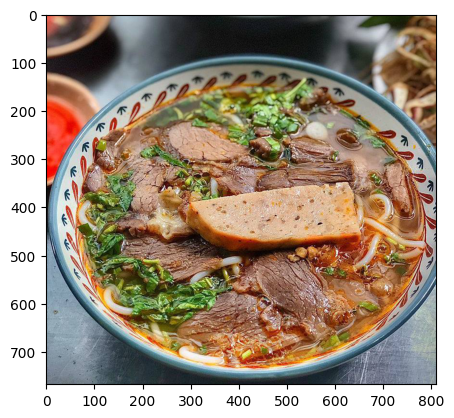

1/1 [==============================] - 0s 18ms/step
banhmi


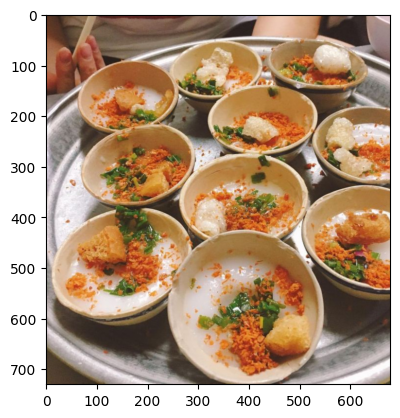

1/1 [==============================] - 0s 20ms/step
banhchung


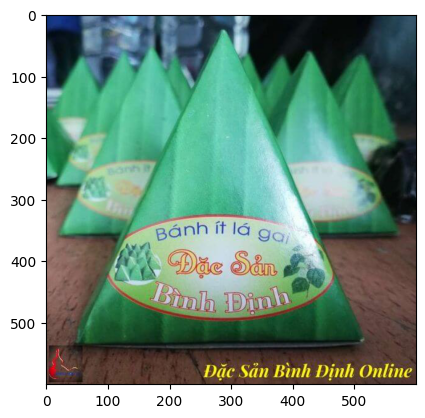

1/1 [==============================] - 0s 21ms/step
banhxeo


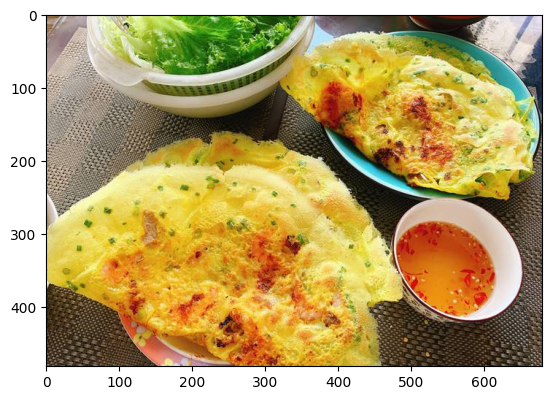

1/1 [==============================] - 0s 19ms/step
banhcan


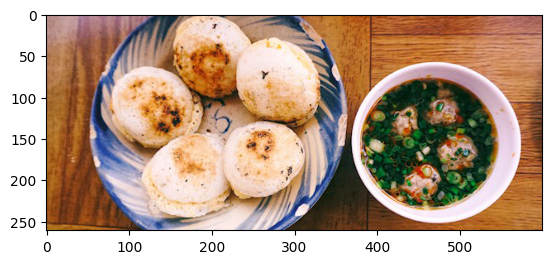

1/1 [==============================] - 0s 19ms/step
banhtrungthu


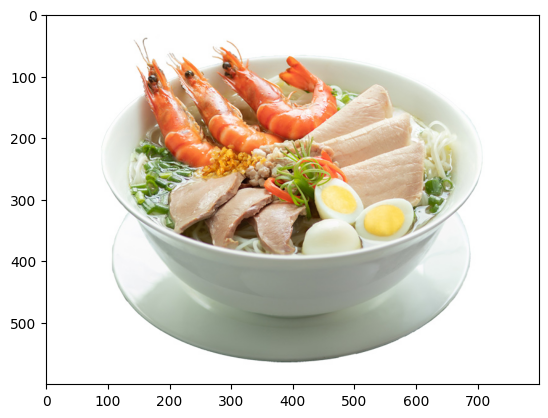

1/1 [==============================] - 0s 32ms/step
banhchung


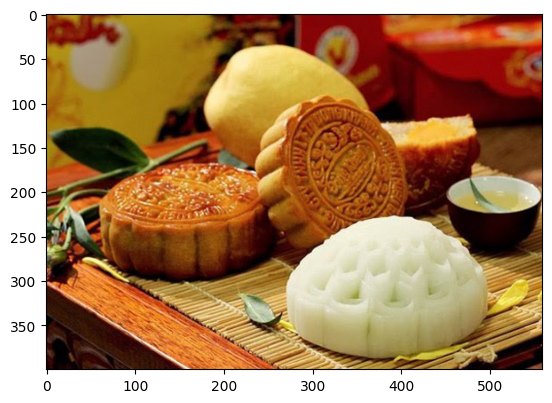

1/1 [==============================] - 0s 38ms/step
banhxeo


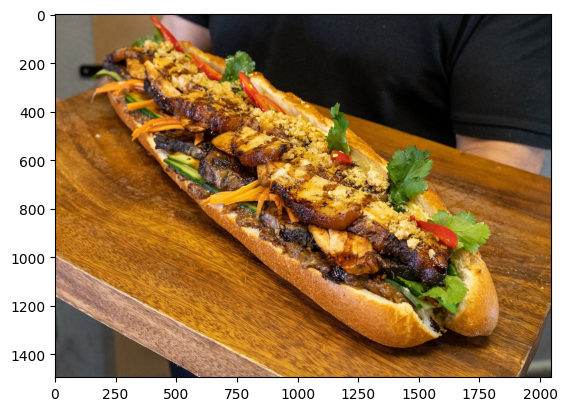

1/1 [==============================] - 0s 27ms/step
banhtet


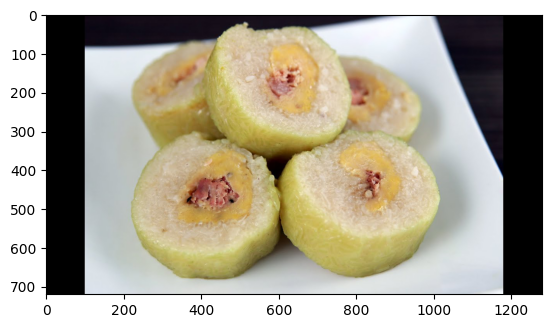

1/1 [==============================] - 0s 19ms/step
banhchung


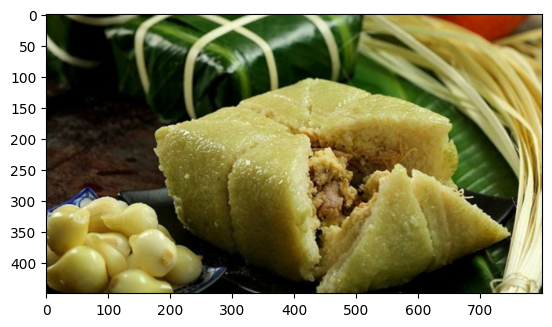

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
folder = '/content/drive/MyDrive/ai/testfood/'
for file in listdir(folder):
  photo = load_img(folder  +  file)
  plt.imshow(photo)
  
  photo = load_img(folder +   file, target_size = (40, 40))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  class_name=['','banhbeo','banhcan','banhchung','banhit','banhmi','banhtet','banhtrungthu','banhxeo','bunbohue','hutieu']
  print(class_name[result])
  plt.show()